# Predictive Analytics

## Telecom Customer Churn Prediction 

This project focuses on predicting customer churn by analyzing key behavioral patterns and developing machine learning models. The code below implements the all project steps including EDA, data preparation, model selection, and evaluation.

**Project Overview**

The goal of this project is to predict customer churn for a telecommunications company using various customer attributes and behavior data. Churn prediction is a crucial problem for businesses, as it enables them to take proactive measures to retain valuable customers. The target model will identify customers who are at risk of leaving, allowing the company to develop personalized retention strategies. The business problem we're addressing is reducing churn to help the company retain revenue and improve customer satisfaction.
The dataset consists of various features such as account tenure, customer service calls, monthly charges, and usage statistics, which will be used to predict whether a customer will leave (churn) or continue using the service.

**Dataset**

The dataset, obtained from Kaggle, a reputable platform for sharing and sourcing datasets, includes detailed information about customer usage patterns and telecom service attributes, such as account weeks, customer service calls, monthly charges, and more.

Key features:

- *Churn:* Target variable (binary - 1 for churn, 0 for retention)
- *AccountWeeks:* Account activity measured in weeks
- *ContractRenewal:* Indicates if a customer renewed their contract
- *DataPlan:* Whether the customer has a data plan
- *DataUsage:* The amount of data used by the customer
- *CustServCalls:* Number of calls to customer service
- *DayMins:* Minutes of daytime calls
- *MonthlyCharge:* The monthly cost of the service
- *OverageFee:* Fee for exceeding service limits
- *RoamMins:* Minutes spent roaming

### Exploratory Data Analysis (EDA)

To explore the data, I began by conducting a thorough exploratory data analysis (EDA) to understand the distribution of key features and their relationships with customer churn. The initial step involved plotting the distribution of important features and investigating how these variables are associated with churn status.

#### Data Analysis and Visualization:

In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


In [3]:
# Data Exploration

# Get information about the dataset (columns, non-null counts, data types)
# This helps us understand the structure of the dataset, including column names, data types, 
# and the number of non-null values in each column. It is essential for detecting any potential data type issues.
print("Dataset Information:")
print(df.info())
print("\n")

# Summary statistics  
# Provides basic statistical details like mean, standard deviation, min, max, and percentiles
# for numerical features. Useful for identifying outliers and general data distribution.
print("Summary Statistics for Numerical Columns:")
print(df.describe())
print("\n")

# Check for missing values in the dataset
# Identifies the total count of missing values per column, helping us decide on imputation 
# or removal strategies if necessary.
print("Missing Values in the Dataset:")
print(df.isnull().sum())
print("\n")

# Summary statistics grouped by churn
# This provides insights into how key features differ for churned vs. non-churned customers.
# Helps identify patterns or trends that could indicate which factors contribute to churn.
print("Summary Statistics Grouped by Churn:")
churned_summary = df.groupby('Churn').describe()
print(churned_summary)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None


Summary Statistics for Numerical Columns:
             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144

**Inference from Initial Data Exploration:** 

The initial EDA shows that the dataset contains 3,333 rows and 11 columns. Summary statistics reveal that churned customers tend to have slightly higher account weeks, monthly charges, and roam minutes. Additionally, grouped statistics show a lower contract renewal rate among churned customers, which may be a crucial feature for predicting churn.

### Additional Graphical Exploratory Data Analysis (EDA) Steps

To gain more insights from the dataset and prepare for model building, the following graphical EDA steps are be performed to help us understand the relationships between various features.

### 1. Churn Distribution

This plot visualizes the distribution of churned versus non-churned customers to provide insights into the proportion of customers who have left the company compared to those who have stayed. 

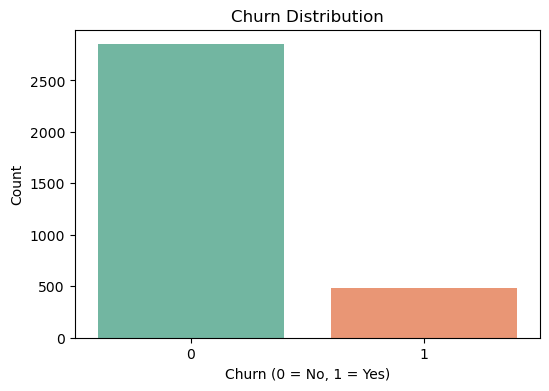

In [4]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of churned (1) and non-churned (0) customers
churn_count = df['Churn'].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(6, 4))

# Created a count plot to visualize the churn distribution
# 'hue' allows us to distinguish between churned and non-churned customers
sns.countplot(data=df, x='Churn', hue='Churn', palette="Set2", legend=False)

# Add title and labels to the plot for better clarity
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Display the plot
plt.show()


### 2. Churn vs. Monthly Charge

This plot investigates whether higher monthly charges are associated with an increased likelihood of churn. By comparing the distribution of monthly charges between customers who churned and those who stayed, this box plot can help us assess whether pricing influences customer retention. 

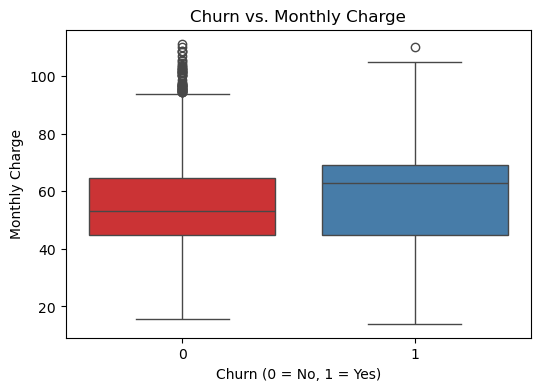

In [5]:
# Boxplot for Churn vs. Monthly Charge

# Set up the figure size for the box plot
plt.figure(figsize=(6, 4))

# Created a boxplot to compare the distribution of MonthlyCharge for churned vs. non-churned customers
# 'hue' distinguishes between churned (1) and non-churned (0) customers, and palette is used for color distinction
sns.boxplot(x='Churn', y='MonthlyCharge', data=df, hue='Churn', palette="Set1", legend=False)

# Add title to the plot to describe the relationship being visualized
plt.title('Churn vs. Monthly Charge')

# Label the x-axis to indicate what each axis represents (Churn status)
plt.xlabel('Churn (0 = No, 1 = Yes)')

# Label the y-axis to indicate the feature being plotted (Monthly Charge)
plt.ylabel('Monthly Charge')

# Display the plot
plt.show()

### 3. Churn by Data Plan

This plot examines whether the type of data plan influences churn rates. By comparing churn rates between customers with different data plans, this bar plot can provide insights into how the type of plan impacts customer retention.  

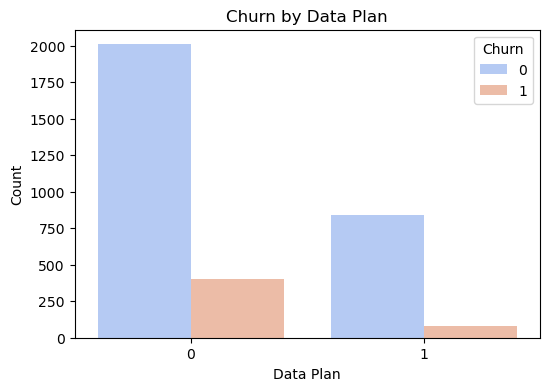

In [6]:
# Set up the figure size for the bar plot
plt.figure(figsize=(6, 4))

# Created a bar plot to visualize churn distribution across different data plans
# The 'hue' parameter distinguishes between churned (1) and non-churned (0) customers, and palette is used for color distinction
sns.countplot(x='DataPlan', hue='Churn', data=df, palette="coolwarm")

# Add title to the plot to describe what the plot represents (Churn by Data Plan)
plt.title('Churn by Data Plan')

# Label the x-axis to indicate the different data plans
plt.xlabel('Data Plan')

# Label the y-axis to indicate the count of customers
plt.ylabel('Count')

# Display the plot
plt.show()

### 4. Customer Service Calls vs. Churn: 

This plot explores the relationship between the number of customer service calls and churn. A bar plot is used to visualize how frequently customers contact customer service and how this correlates with their likelihood to churn.

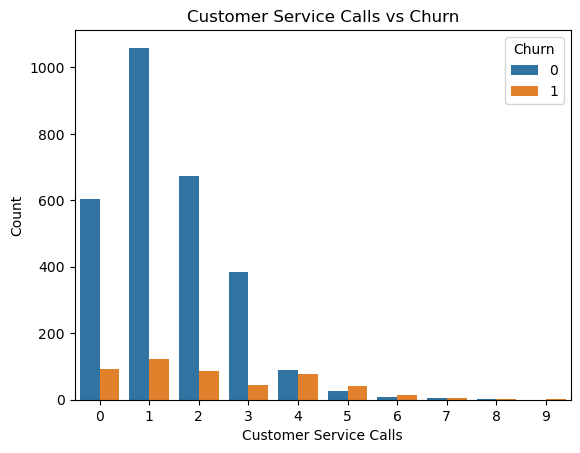

In [7]:
# Created a count plot to visualize the relationship between customer service calls and churn
# The 'hue' parameter distinguishes between churned (1) and non-churned (0) customers based on their service call frequency
sns.countplot(x='CustServCalls', hue='Churn', data=df)

# Add a title to the plot for clarity
plt.title('Customer Service Calls vs Churn')

# Label the x-axis to indicate the number of customer service calls
plt.xlabel('Customer Service Calls')

# Label the y-axis to indicate the count of customers
plt.ylabel('Count')

# Display the plot
plt.show()

### 5. Heatmap of Feature Correlations

This plot presents a heatmap that visualizes the correlations between various numeric features, such as 'DataUsage', 'DayMins', 'CustServCalls', and others. By examining the relationships between these variables, we can identify which features are strongly correlated with churn and with each other. This analysis will provide valuable insights into the key drivers of customer churn and help inform the feature selection process for model building.

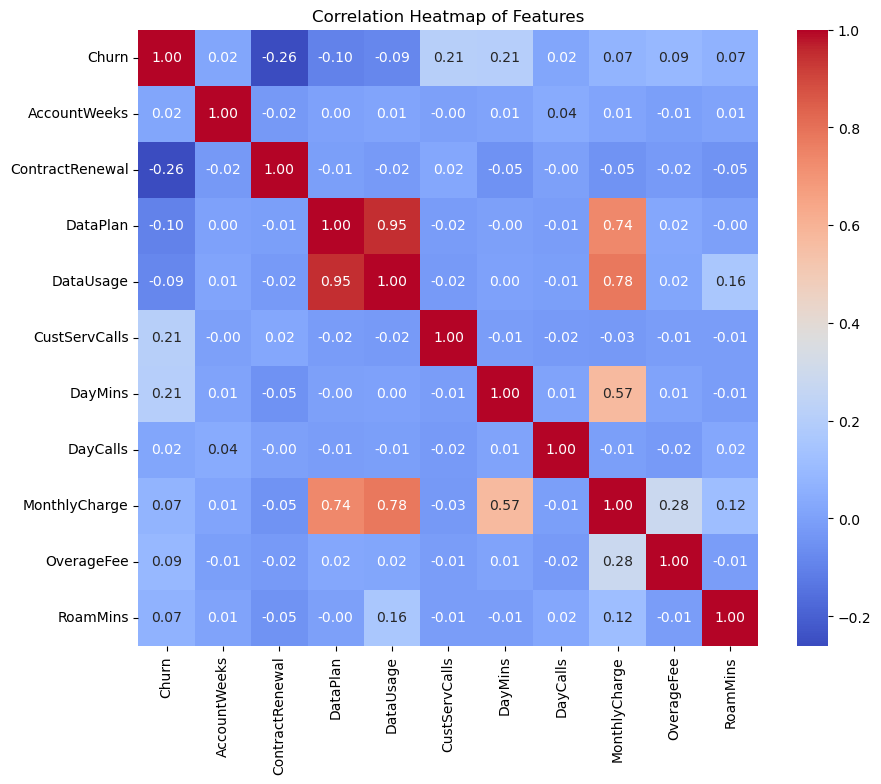

In [8]:
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(10, 8))

# Compute the correlation matrix to show relationships between features
corr_matrix = df.corr()

# Created a heatmap to visualize the correlation matrix
# 'annot=True' adds numerical annotations on the heatmap
# 'cmap="coolwarm"' sets the color scheme for the heatmap
# 'fmt=".2f"' formats the annotations to two decimal places
# 'cbar=True' adds a color bar to indicate the strength of correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Add a title to the heatmap for context
plt.title("Correlation Heatmap of Features")

# Display the heatmap
plt.show()

# Data Preparation

#### 1. Dropping Unnecessary Features
Initial EDA revealed a strong correlation between DataPlan and DataUsage. To avoid multicollinearity, dropped 'DataPlan' as it does not add independent predictive value.

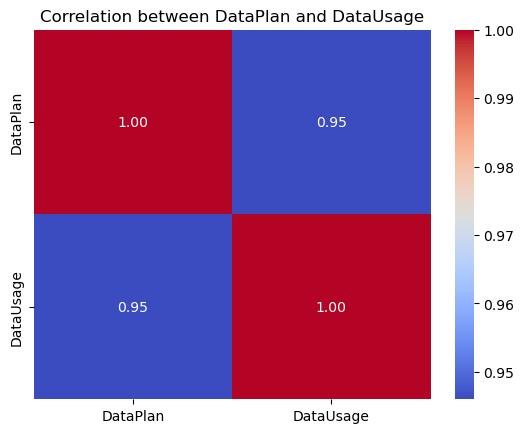

Dropped 'DataPlan' due to high correlation with 'DataUsage'


In [9]:
# Check correlation between DataPlan and DataUsage
correlation_matrix = df[['DataPlan', 'DataUsage']].corr()

# Display correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between DataPlan and DataUsage")
plt.show()

# Drop DataPlan if highly correlated
if abs(correlation_matrix.loc['DataPlan', 'DataUsage']) > 0.8:
    df.drop(columns=['DataPlan'], inplace=True)
    print("Dropped 'DataPlan' due to high correlation with 'DataUsage'")

#### 2. Handling Missing Values and data consistency
Missing values in numerical columns if any are imputed with the median to preserve the central tendency of the data while avoiding the influence of outliers. 

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Fill missing values in numerical columns with the median
# used median approach as it preserves the distribution and doesn’t introduce bias like mean imputation might
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

# Verify that missing values are handled
print("Missing Values after filling:\n", df.isnull().sum())

Missing Values after filling:
 Churn              0
AccountWeeks       0
ContractRenewal    0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


#### 3. Handle outliers, transformations 
Ensure data consistency, reduce skewness, and standardize features for better model performance.

In [11]:
# Check summary statistics for outliers and skewness
print("\nSummary statistics for continuous features:")
print(df.describe())


Summary statistics for continuous features:
             Churn  AccountWeeks  ContractRenewal    DataUsage  CustServCalls  \
count  3333.000000   3333.000000      3333.000000  3333.000000    3333.000000   
mean      0.144914    101.064806         0.903090     0.816475       1.562856   
std       0.352067     39.822106         0.295879     1.272668       1.315491   
min       0.000000      1.000000         0.000000     0.000000       0.000000   
25%       0.000000     74.000000         1.000000     0.000000       1.000000   
50%       0.000000    101.000000         1.000000     0.000000       1.000000   
75%       0.000000    127.000000         1.000000     1.780000       2.000000   
max       1.000000    243.000000         1.000000     5.400000       9.000000   

           DayMins     DayCalls  MonthlyCharge   OverageFee     RoamMins  
count  3333.000000  3333.000000    3333.000000  3333.000000  3333.000000  
mean    179.775098   100.435644      56.305161    10.051488    10.237294  


In [12]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Detect and remove outliers using Interquartile Range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of continuous features from the dataset summary
continuous_features = [
    'DayMins', 'MonthlyCharge', 'RoamMins', 'OverageFee', 'DataUsage', 'DayCalls',
]

# Remove outliers for each continuous feature
for feature in continuous_features:
    df = remove_outliers(df, feature)

# Log transformation to reduce skewness (applied only to positive-valued columns)
df['LogDayMins'] = np.log1p(df['DayMins'])
df['LogMonthlyCharge'] = np.log1p(df['MonthlyCharge'])
df['LogRoamMins'] = np.log1p(df['RoamMins'])
df['LogOverageFee'] = np.log1p(df['OverageFee'])
df['LogDataUsage'] = np.log1p(df['DataUsage'])   
df['LogDayCalls'] = np.log1p(df['DayCalls'])   

# verify the dataset after transformations
print(df.describe())

             Churn  AccountWeeks  ContractRenewal    DataUsage  CustServCalls  \
count  3170.000000   3170.000000      3170.000000  3170.000000    3170.000000   
mean      0.140379    100.956467         0.906309     0.789811       1.570978   
std       0.347434     39.870048         0.291444     1.236544       1.314354   
min       0.000000      1.000000         0.000000     0.000000       0.000000   
25%       0.000000     74.000000         1.000000     0.000000       1.000000   
50%       0.000000    101.000000         1.000000     0.000000       1.000000   
75%       0.000000    127.000000         1.000000     1.700000       2.000000   
max       1.000000    243.000000         1.000000     4.320000       9.000000   

           DayMins     DayCalls  MonthlyCharge   OverageFee     RoamMins  \
count  3170.000000  3170.000000    3170.000000  3170.000000  3170.000000   
mean    179.083659   100.591483      55.904732    10.042757    10.234953   
std      52.252072    19.358177      15.62

#### 4. Engineer new useful features.
To improve predictive performance and better capture customer behavior, several new features were engineered.

**Customer Behavior Features:**
 - *HighCustServCalls:* This feature indicates whether a customer has a high number of customer service calls, which could be correlated with churn.
 - *AvgCallDuration:* This shows the average duration of calls, indicating whether customers make long or short calls.
   
**Account Usage Features:**
  - *TotalUsage:* This sums up the total usage (minutes and data), helping to track overall consumption.
    
**Customer Longevity Features:**
   - *LongTermCustomer:*  This feature indicates whether the customer has been with the company longer than the median, which could be predictive of their loyalty.
       
**Price Sensitivity Features:**
 - *CostEfficiency:* This indicates the price the customer is paying per unit of data usage, which could affect churn if it's too high.

In [13]:
# Feature Engineering: Creating new features using log-transformed data

# HighCustServCalls: Flags customers who made more than 3 customer service calls (potentially at risk of churn)
df['HighCustServCalls'] = (df['CustServCalls'] > 3).astype(int)

# LongTermCustomer: Identifies customers who have been with the company longer than the median account duration
df['LongTermCustomer'] = (df['AccountWeeks'] > df['AccountWeeks'].median()).astype(int)

# TotalUsage: Aggregates log-transformed usage metrics (DayMins, RoamMins, and DataUsage) to represent overall usage
df['TotalUsage'] = df['LogDayMins'] + df['LogRoamMins'] + df['LogDataUsage']

# AvgCallDuration: Estimates average call duration using log-transformed DayMins, adjusted for total calls
# Adding 1 to LogDayCalls prevents division errors when DayCalls is low
df['AvgCallDuration'] = df['LogDayMins'] / (df['LogDayCalls'] + 1)

# CostEfficiency: Measures cost per unit of usage, using log-transformed MonthlyCharge and TotalUsage
# Adding 1 to TotalUsage prevents division errors for low-usage customers
df['CostEfficiency'] = df['LogMonthlyCharge'] / (df['TotalUsage'] + 1)

# Display the first few rows of the new features
print(df[['HighCustServCalls', 'LongTermCustomer', 'TotalUsage', 'AvgCallDuration', 'CostEfficiency']].head())

   HighCustServCalls  LongTermCustomer  TotalUsage  AvgCallDuration  \
0                  0                 1    9.290100         0.977992   
1                  0                 1    9.326703         0.874750   
2                  0                 1    8.079023         0.957158   
4                  0                 0    7.529122         0.892957   
5                  0                 1    7.401305         0.967527   

   CostEfficiency  
0        0.437295  
1        0.427904  
2        0.437304  
4        0.438224  
5        0.483311  


#### 6. Standardize Features using StandardScaler
Standardization is performed to adjust the features so that they have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, allowing them to contribute equally to the model and preventing any one feature from disproportionately affecting the results due to differences in scale.

In [14]:
from sklearn.preprocessing import StandardScaler  # For feature scaling (standardization)

# Initialize StandardScaler
scaler = StandardScaler()

# List of columns to scale
scaled_columns = ['LogDayMins', 'LogMonthlyCharge', 'LogRoamMins', 'LogOverageFee', 
                  'LogDataUsage', 'TotalUsage', 'AvgCallDuration', 'CostEfficiency']

# Apply scaling
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Verify the scaled data by checking the first few rows
print("\nFirst few rows of scaled data:")
print(df[scaled_columns].head())

# Verify standardization: mean should be ~0 and std should be ~1
print("\nMean of standardized features (should be ~0):")
print(df[scaled_columns].mean())

print("\nStandard deviation of standardized features (should be ~1):")
print(df[scaled_columns].std())


First few rows of scaled data:
   LogDayMins  LogMonthlyCharge  LogRoamMins  LogOverageFee  LogDataUsage  \
0    1.336323          1.791462     0.029530       0.045915      1.611507   
1   -0.162670          1.499124     1.209106       0.010829      2.034438   
2    1.077454         -0.120353     0.771246      -1.775261     -0.701474   
4   -0.068687         -0.960231     0.066347      -1.031851     -0.701474   
5    0.817642          0.205136    -1.638505       0.473806     -0.701474   

   TotalUsage  AvgCallDuration  CostEfficiency  
0    1.924639         0.867055       -0.650985  
1    1.976517        -0.665551       -1.179620  
2    0.208138         0.557779       -0.650487  
4   -0.571256        -0.395280       -0.598665  
5   -0.752416         0.711712        1.939404  

Mean of standardized features (should be ~0):
LogDayMins         -1.606006e-15
LogMonthlyCharge   -5.872625e-16
LogRoamMins         2.398362e-16
LogOverageFee      -5.939868e-16
LogDataUsage       -1.344876e-17

# Model Building and Evaluation

#### Preprocessing

The dataset exhibited an imbalance, with fewer churned customers compared to retained ones. To mitigate this issue, Synthetic Minority Over-sampling Technique (SMOTE) was applied to oversample the minority class. This ensures that the model does not become biased toward the majority class and improves its ability to detect churned customers.

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Define features and target (after preprocessing steps)
X = df.drop(columns=["Churn"])  # Assuming 'Churn' is the target variable
y = df["Churn"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scaling after SMOTE
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 2180, 1: 2180})


### Model Selection

To address the class imbalance observed in our dataset, selected models that can either incorporate class weights or benefit from resampled data. The following models were evaluated:

**Logistic Regression (Baseline Model)**

- Chosen as a simple, interpretable model to establish a baseline.
- Used *class_weight='balanced'* to compensate for the imbalance.

**Random Forest (Selected Model)**

- Chosen for its ability to handle complex relationships and provide feature importance.
- Used *n_estimators=100* to ensure robust decision trees.

**XGBoost (Evaluated for Performance Gains)**

- Chosen for its boosting mechanism, which iteratively improves predictions.
- Adjusted *scale_pos_weight* to handle class imbalance effectively.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression with class weighting to handle class imbalance
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)  # Train the model
y_pred_log = log_model.predict(X_test)  # Predict on the test set

# Random Forest with 100 decision trees (n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)  # Train the model
y_pred_rf = rf_model.predict(X_test)  # Predict on the test set

# XGBoost with scale_pos_weight to adjust for class imbalance
# scale_pos_weight = (number of majority class samples) / (number of minority class samples)
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]),
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)  # Train the model
y_pred_xgb = xgb_model.predict(X_test)  # Predict on the test set

### Model Evaluation

Since accuracy can be misleading due to class imbalance, we used precision, recall, F1-score, and AUC-ROC. These metrics provided a comprehensive evaluation, ensuring that the model not only detects churn effectively but also minimizes business impact from false predictions.

In [17]:
# Evaluate all models
for model, y_pred in zip(["Logistic Regression", "Random Forest", "XGBoost"], [y_pred_log, y_pred_rf, y_pred_xgb]):
    print(f"{model} Performance:")
    print(classification_report(y_test, y_pred))  # Print precision, recall, f1-score
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))  # Compute AUC-ROC score


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       545
           1       0.45      0.81      0.58        89

    accuracy                           0.83       634
   macro avg       0.71      0.82      0.74       634
weighted avg       0.89      0.83      0.85       634

AUC-ROC Score: 0.8237604370683435
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       545
           1       0.66      0.72      0.69        89

    accuracy                           0.91       634
   macro avg       0.81      0.83      0.82       634
weighted avg       0.91      0.91      0.91       634

AUC-ROC Score: 0.8292753324399547
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       545
           1       0.71      0.67      0.69        89

    accuracy                     

### Interpreting the Model Evaluation Results 

**Logistic Regression:**

- High recall (81%) but low precision (45%), meaning it catches most churners but also misclassifies many non-churners.
- AUC-ROC: Shows decent (0.82) but struggles with precision.
  
*Conclusion:* Good for detecting churn but may lead to unnecessary interventions.

**Random Forest:**

- Balanced recall (72%) and precision (66%), improving overall prediction quality.
- AUC-ROC: Stronger (0.83) than Logistic Regression.
  
*Conclusion:* Reliable model with fewer false positives while still identifying churners well.

**XGBoost:**

- Highest precision (71%), reducing false positives, but lower recall (67%), meaning it may miss some churners.
- AUC-ROC: Competitive (0.81) but slightly lower than Random Forest.
  
*Conclusion:* Best for minimizing false alerts but at the risk of missing some churners.

**Final Model Recommendation:** 

Random Forest was chosen as the optimal model for its strong balance between precision and recall, effectively identifying churned customers while minimizing false positives. 

The next steps will focus on summarizing key insights from the analysis and providing final recommendations based on the top features influencing churn. 

#### Top 5 Important Features: Key Drivers of Churn

To better understand what drives customer churn, analyzed feature importance using the trained Random Forest model.

Top 5 Important Features for Churn Prediction:
             Feature  Importance
1    ContractRenewal    0.140176
3      CustServCalls    0.083119
6      MonthlyCharge    0.078400
4            DayMins    0.075661
10  LogMonthlyCharge    0.073378


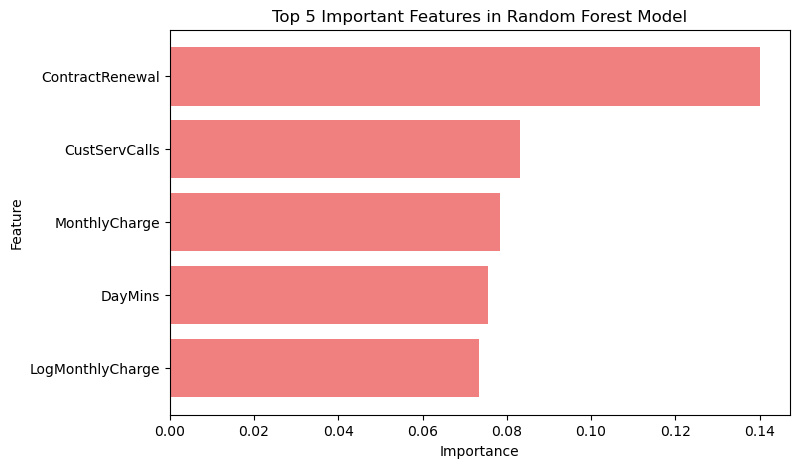

In [18]:
# extract top 5 featurs to help explain what drives churn the most
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained Random Forest model
feature_importance = pd.DataFrame({
    "Feature": X_train.columns, 
    "Importance": rf_model.feature_importances_
})

# Sort by importance and select the top 5 features
top_features = feature_importance.sort_values(by="Importance", ascending=False).head(5)

# Display the top 5 important features
print("Top 5 Important Features for Churn Prediction:")
print(top_features)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(top_features["Feature"], top_features["Importance"], color='lightcoral')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 5 Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

#### Summary of Findings and Recommendations

The Random Forest model identified key factors influencing customer churn. The most impactful predictors include contract renewal status, customer service interactions, monthly charges, and call/data usage patterns.

**Key Insights:**
    
- Contract Renewal is the strongest indicator of churn. Customers who don’t renew contracts are at higher risk.
- Customer Service Calls show that frequent support interactions correlate with churn, possibly due to unresolved issues or dissatisfaction.
- Monthly Charges and Data Usage suggest that customers with high costs or suboptimal plan fit are more likely to leave.
  
**Recommendations for Reducing Churn:**

- Encourage Contract Renewals – Offer incentives like discounts or exclusive perks for renewing contracts.
- Improve Customer Support – Reduce frustration by resolving issues efficiently and personalizing assistance.
- Optimize Pricing & Plans – Provide customized recommendations based on customer spending and usage.
- Monitor Usage Behavior – Detect at-risk customers based on call/data trends and proactively offer better plan options.
  
By implementing these strategies, companies can enhance customer satisfaction, reduce churn, and strengthen retention efforts.